In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import matplotlib.pyplot as plt 

#day 3
from scipy.stats import ttest_ind 
from scipy.stats import probplot
import pylab 

cereal.csv



In [2]:
cereals = pd.read_csv("../input/cereal.csv")
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [4]:
cereal = "sodium"
cereal = "sugars"

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

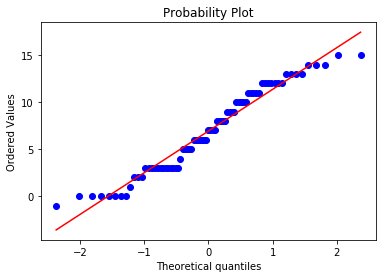

In [5]:
probplot(cereals[cereal], dist="norm", plot=pylab)


In [6]:
hotCereals = cereals[cereal][cereals["type"] == "H"]
coldCereals = cereals[cereal][cereals["type"] == "C"]
ttest_ind(hotCereals, coldCereals, equal_var=False)

Ttest_indResult(statistic=-4.9948464517555546, pvalue=0.018743720131906921)

In [7]:
print("Mean {} Hot : {}".format(cereal, hotCereals.mean()))
print("Mean {} Cold : {}".format(cereal, coldCereals.mean()))

Mean sugars Hot : 0.6666666666666666
Mean sugars Cold : 7.175675675675675


Text(0.5,1,'sugars')

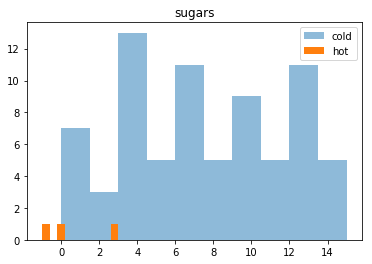

In [8]:
plt.hist(coldCereals, alpha=0.5, label='cold')
plt.hist(hotCereals, label='hot')
plt.legend(loc='upper right')
plt.title(cereal)